In this example, we will use Multicell to simulate the self-reorganization of a geometrical Turing pattern, based on equations developed by Gierer and Meinhardt, as the cells of the underlying tissue grow and divide.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 20, 1, 1e-3)

## Biological species

In [4]:
sim.register_cell_variable("a")
sim.register_cell_variable("h")

## Computed variables

In [5]:
def c_a2(c_a, **kwargs):
    return c_a ** 2

sim.register_computed_variable("c_a2", c_a2)

## Constants

In [6]:
sim.set_constants({"mu_a": 1e-1, "mu_h": 2e-1, "rho_a": 1., "rho_h": 1., "q": 1., "H": 0.35, "A": 0., "D_h": 5., "D_a": 0.025})

## Differential equations

In [7]:
def da_dt(simulation, a, c_a, c_a2, c_h, D_a, mu_a, rho_a, A, q, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + rho_a * c_a2 / c_h / (1 + q**2 * c_a2) - mu_a * a + A

def dh_dt(simulation, h, c_a2, c_h, D_h, mu_h, rho_h, H, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_h, c_h, adjacency_matrix) + rho_h * c_a2 - mu_h * h + H

sim.set_ODE("a", da_dt)
sim.set_ODE("h", dh_dt)

In [8]:
sim.initialize_cell_variables()

a0 = np.full(sim.n_cells, 0.789)
h0 = np.full(sim.n_cells, 4.863)

sim.set_cell_variable("a", a0)
sim.set_cell_variable("h", h0)

## Duration

The duration of the simulation is set to a large value to let the system stabilize after each growth and division step.

In [9]:
sim.set_duration(1e8)

## Tissue growth

In [10]:
sim.enable_growth(n_steps=11)
sim.register_growth_method(multicell.growth.linear_growth, {"coefficient": [1.1, 1.05, 1.]})

## Cell divisions

In [11]:
sim.enable_division()
sim.register_division_method(multicell.division.symmetrical_division)
sim.register_division_trigger(multicell.division.volume_trigger, {"volume_threshold": 2.})

## Rendering

In [12]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 1.3, "view_size": 60, "view": (90, -90), "axes": False})

# Visualization of the initial state

<IPython.core.display.Javascript object>


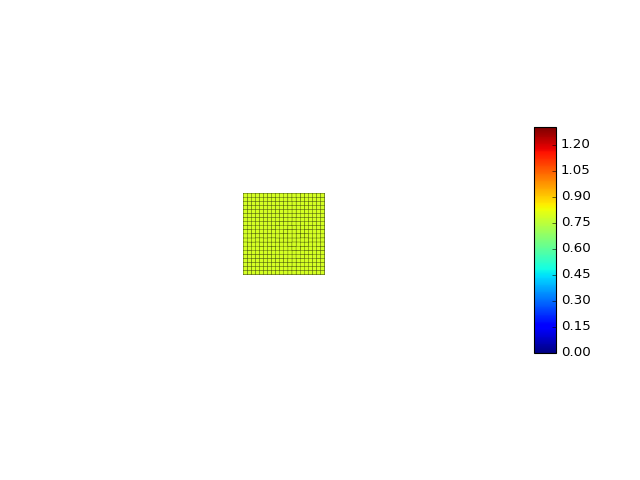

Time point: 0.0
c_a: from 0.788267888129 to 0.789720381736
c_h: from 4.85848762987 to 4.86744007146


In [13]:
sim.renderer.display("c_a")

# Simulation

Growth step #0
Growth of the tissue: 0.591077804565 seconds
Cell divisions: 0.606067895889 seconds


<IPython.core.display.Javascript object>


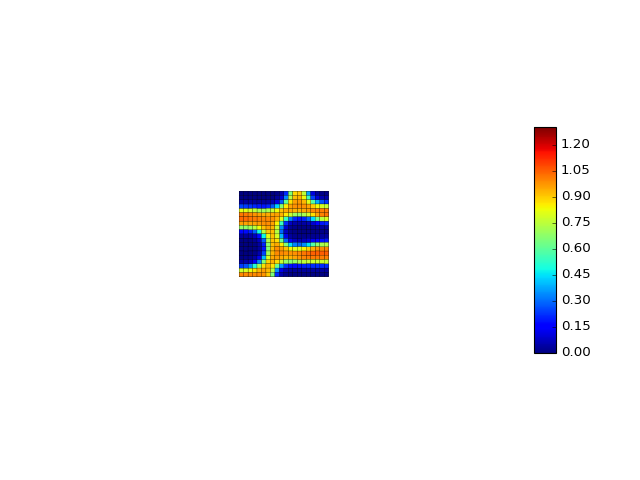

Time point: 9090909.09091
c_a: from 0.00049110469451 to 1.05341673708
c_h: from 3.20892889362 to 4.24310961395
Growth step #1
Growth of the tissue: 0.502301931381 seconds
Cell divisions: 0.661628961563 seconds


<IPython.core.display.Javascript object>


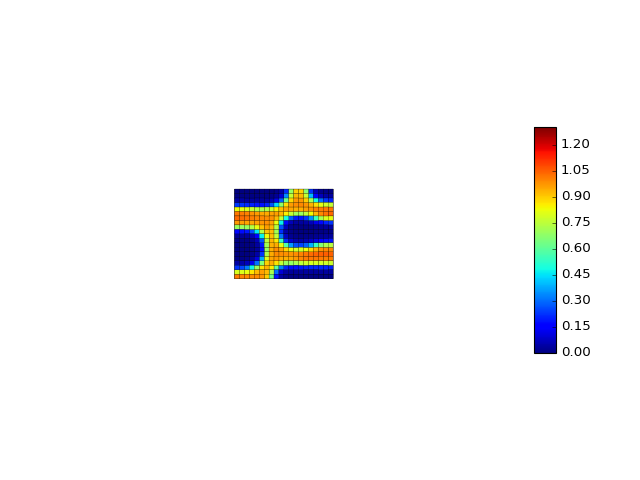

Time point: 18181818.1818
c_a: from 0.000393399842684 to 1.05132867835
c_h: from 2.75598204385 to 3.67915536205
Growth step #2
Growth of the tissue: 0.60326218605 seconds
Cell divisions: 0.651101112366 seconds


<IPython.core.display.Javascript object>


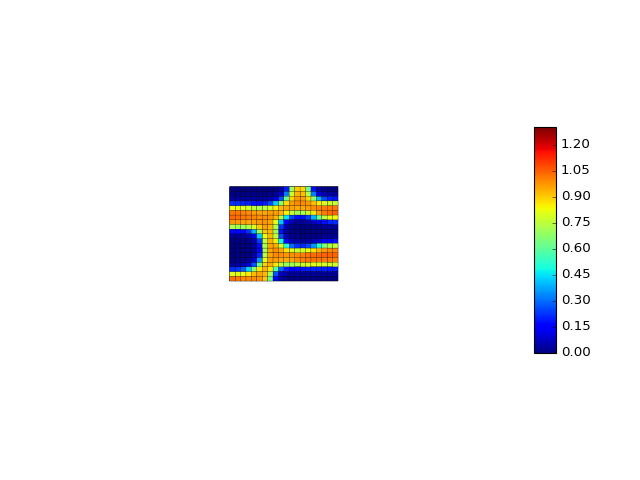

Time point: 27272727.2727
c_a: from 0.000317323943896 to 1.04811161325
c_h: from 2.36600070036 to 3.19037864572
Growth step #3
Growth of the tissue: 0.541099786758 seconds
Cell divisions: 0.648428916931 seconds


<IPython.core.display.Javascript object>


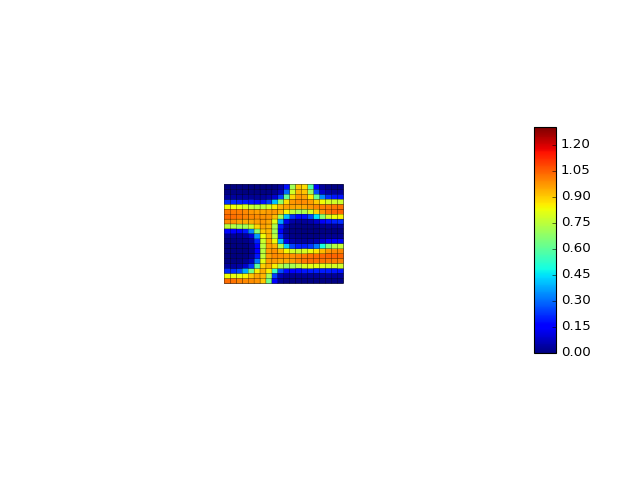

Time point: 36363636.3636
c_a: from 0.000258766589987 to 1.04456908149
c_h: from 2.03070319707 to 2.76691993098
Growth step #4
Growth of the tissue: 0.54866194725 seconds
Cell divisions: 3.41303110123 seconds


<IPython.core.display.Javascript object>


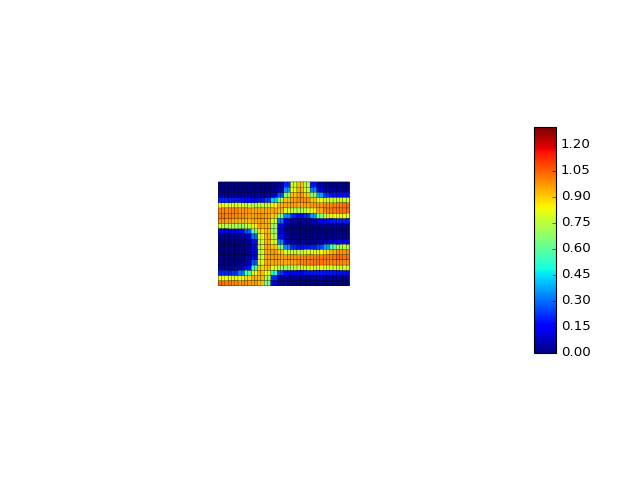

Time point: 45454545.4545
c_a: from 0.000212418897488 to 1.0373027074
c_h: from 1.72609985673 to 2.39092320953
Growth step #5
Growth of the tissue: 1.34506893158 seconds
Cell divisions: 1.91503405571 seconds


<IPython.core.display.Javascript object>


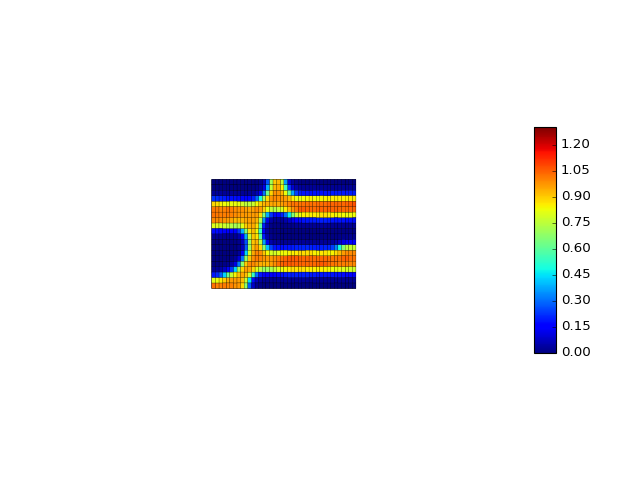

Time point: 54545454.5455
c_a: from 0.000179045575966 to 1.07088713046
c_h: from 2.94050058218 to 4.11412546972
Growth step #6
Growth of the tissue: 1.31961798668 seconds
Cell divisions: 1.66218805313 seconds


<IPython.core.display.Javascript object>


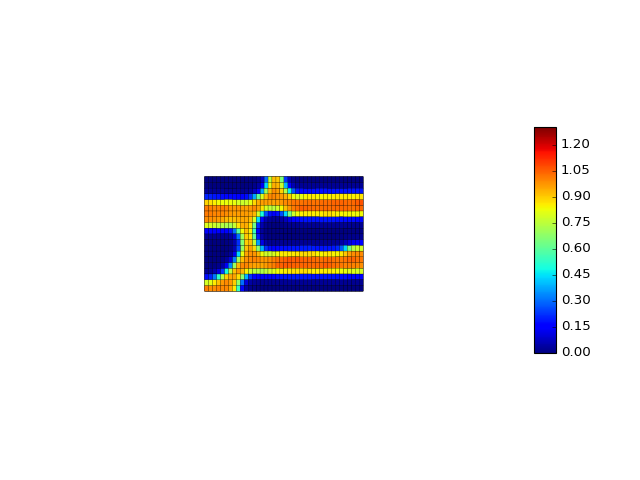

Time point: 63636363.6364
c_a: from 0.000153209313836 to 1.06789401014
c_h: from 2.52431400575 to 3.55861698093
Growth step #7
Growth of the tissue: 1.29180812836 seconds
Cell divisions: 1.69299006462 seconds


<IPython.core.display.Javascript object>


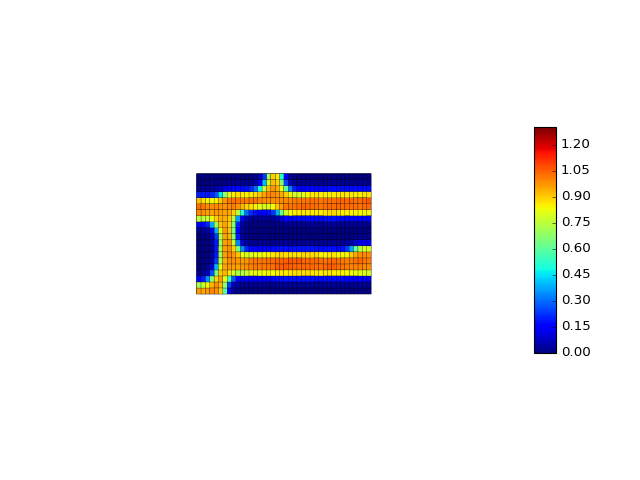

Time point: 72727272.7273
c_a: from 0.000299547574762 to 1.0646616003
c_h: from 2.20746753239 to 3.08525034126
Growth step #8
Growth of the tissue: 1.35324215889 seconds
Cell divisions: 1.60265612602 seconds


<IPython.core.display.Javascript object>


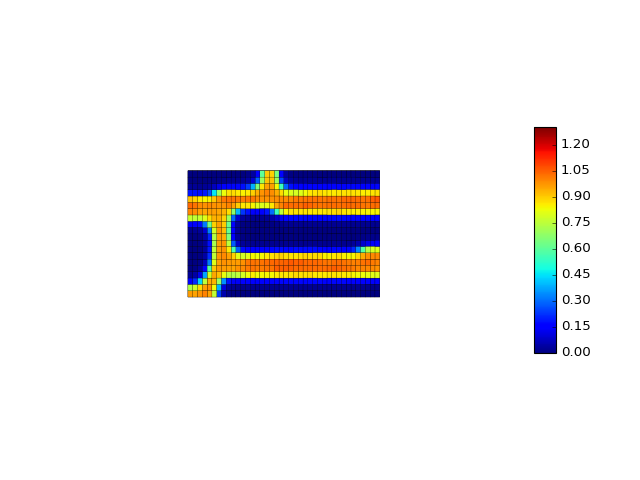

Time point: 81818181.8182
c_a: from 0.000233898513505 to 1.06120164423
c_h: from 1.89311334367 to 2.67405008797
Growth step #9
Growth of the tissue: 1.31128406525 seconds
Cell divisions: 7.96327114105 seconds


<IPython.core.display.Javascript object>


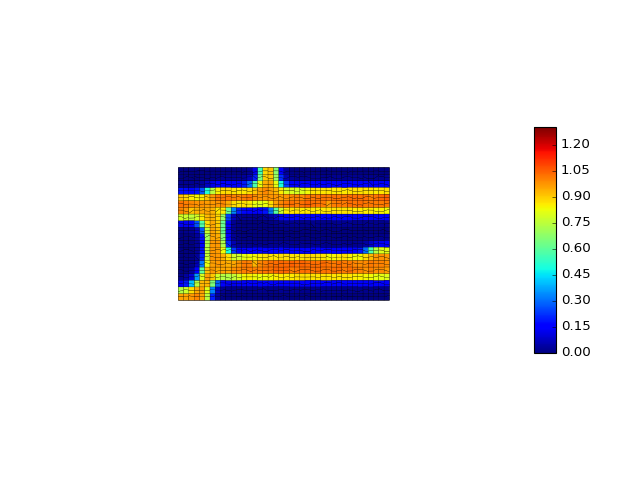

Time point: 90909090.9091
c_a: from 0.000166622135589 to 1.04892524232
c_h: from 1.59304447416 to 2.31298461966
Growth step #10
Growth of the tissue: 2.860008955 seconds
Cell divisions: 4.56741595268 seconds


<IPython.core.display.Javascript object>


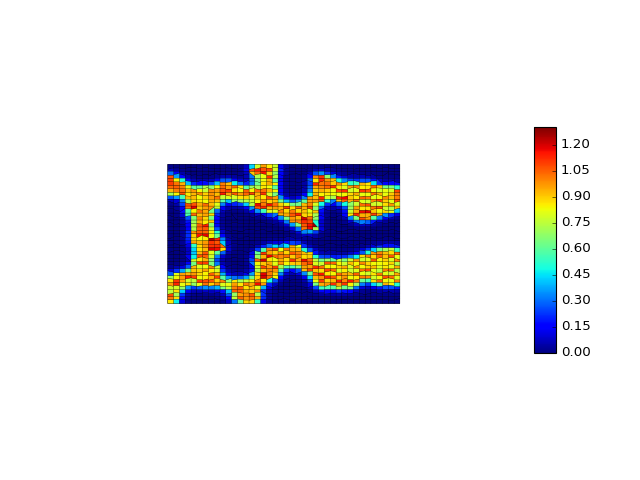

Time point: 100000000.0
c_a: from 1.70898277659e-05 to 1.25996831018
c_h: from 2.64400171723 to 4.16177094593


In [14]:
sim.simulate()

We can see that as the tissue grows and the cells divide, new ridges of activator engulf into the valleys widened by growth.

Cell divisions do not directly trigger the reorganization of the pattern, because the spatial distribution of chemical species does not actually change (new cells have the same concentrations as former cells and occupy the same space). However, they do modify how far the inhibitor can reach, relatively to the pattern previously achieved. Where it cannot reach, the activator starts being expressed. 